In [2]:
from sedaro import SedaroApiClient
from pprint import pprint

API_KEY = "PKDqMrtcTK4plJgL7qVlQD.0xQph1lyKzd-pV0-ZL7bRIH7BX54Yjqbz6tluwut3Hvp8XE-RVbfHSz2o5vC77scUhg2xBFuBybplxY6FyXXMQ"
TEMP_AGENT_REPO_BRANCH_ID = "PS5ZPCp6mh5yXLH3lkCWFj" # Specific Repo of the Templated agent 
SCENARIO_BRANCH_VERSION_ID = "PRx5rSwrGfkK4n9vFXmVbt" # Version 2
WORKSPACE_ID = "PQtnGZNNPdzZM5JdVhP5P9" # Violet/Ethreal workspace

# Define modules
sedaro = SedaroApiClient(api_key = API_KEY)
# agent template is only for satellite model (agent), and don't copy the model repo ID, only the branch ID (version)
scenario_branch = sedaro.scenario(SCENARIO_BRANCH_VERSION_ID)

/Users/hubertliu/Library/Python/3.9/lib/python/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.27.2 is exactly one major version older than the runtime version 6.31.1 at cosim.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(


In [ ]:
print(scenario_branch.TemplatedAgent.get_all())
print(scenario_branch.PeripheralAgent.get_all())




[
TemplatedAgent(
   angularVelocity=None
   annotations={'$': {'subsystem': 'Agents'}}
   attitude=None
   disabled=False
   externalState=[]
   id='PRkHzzmM9MMY9JPfBDd7LC'
   kinematics='PS5ZtmmnWlynTsPKYs5HSd'
   name='My In-orbit Spacecraft'
   position={'eci': [4722.155958392787, 4722.1559583927865, 0.0]}
   targetGroupMapping={}
   targetMapping={'PRknkFRHNYJhkCV8b53CLG': {'associatedTargets': ['PRkndRsqYQpwX9b5mNccvk', 'PS5ZRYkBkbxXXnmGDsyCQ6']}, 'PRx5x67Z7LxtW5RNXvCfwR': {'associatedTargets': ['PRwwslS9wmTbjh3H55nRX7', 'PS5ZRvjGmMkDDHf8CVMpg8']}, 'PRykkzdKj7Mbc2vD2PHq7D': {'associatedTargets': ['PRykkByqkk6x6vJjlRrp4b', 'PS5ZRN4ZPJB3wv89F4kxcw']}}
   templateRef='PS5ZPCp6mh5yXLH3lkCWFj'
   type='TemplatedAgent'
   velocity={'eci': [-5.462937449923098, 5.462937449923099, 0.0]}
)
]
[
PeripheralCelestialPoint(
   angularVelocity=None
   annotations={'$': {'subsystem': 'Agents'}}
   attitude=None
   body='SUN'
   disabled=False
   externalState=[]
   id='PRykkzdKj7Mbc2vD2PHq7D'
   

In [3]:
sim = scenario_branch.simulation
sim_result = sim.results()



Downloading...
...download complete!
Processing downloaded data...


In [ ]:
sim_datafram = sim_result.dataframe

{'PRkHzzmM9MMY9JPfBDd7LC/2': Dask DataFrame Structure:
              NSghWfrUj9OyAK8OBAXa-.current NSghWfrUj9OyAK8OBAXa-.dischargeCurrentMargin NSghWfrUj9OyAK8OBAXa-.power NSghWfrUj9OyAK8OBAXa-.soc NSghWfrUj9OyAK8OBAXa-.voc NSghWfrUj9OyAK8OBAXa-.voltage NSghYm2RqDibih0igHFc-.controllerBusCurrent NSghYm2RqDibih0igHFc-.controllerBusVoltage NSghYm2RqDibih0igHFc-.dissipations.internalLoads NSghYm2RqDibih0igHFc-.dissipations.busRegulators NSghYm2RqDibih0igHFc-.dissipations.powerController NSghYm2RqDibih0igHFc-.dissipations.total NSghYm2RqDibih0igHFc-.outputPowerMargin NSghYm2RqDibih0igHFc-.outputPowers.loads NSghYm2RqDibih0igHFc-.outputPowers.busRegulators NSghYm2RqDibih0igHFc-.outputPowers.total NSghYm2RqDibih0igHFc-.powerConsumed NSghYm2RqDibih0igHFc-.processorMode NSghaQGUD5XkZv-hq4TTV.dissipations.total NSghaQGUD5XkZv-hq4TTV.powerConsumed NSghcbxRIX9eXogEB0li-.dissipations.total NSghcbxRIX9eXogEB0li-.powerConsumed NSgheitRQ51bMoH_95sZk.dissipations.total NSgheitRQ51bMoH_95sZk.powerConsu

In [ ]:
all_results = sim.results(sampleRate=1)
print(all_results.summarize()) 
for key in all_results.dataframe.keys():
    # each key is a tuple, e.g. ('FooAgent',) or ('FooAgent','GNC')
    print(key)


Downloading...
...download complete!
Processing downloaded data...
---------------------------------------------------------------------------
                      Sedaro Simulation Result Summary                     
---------------------------------------------------------------------------
✅ Simulation succeeded after 128.1s

🛰️ Templated Agents 
    • My In-orbit Spacecraft

📡 Peripheral Agents 
    • My Ground Point
    • Sat 2
---------------------------------------------------------------------------
❓ Query agent results with .agent(<NAME>)
None
PRkHzzmM9MMY9JPfBDd7LC/2
PRkHzzmM9MMY9JPfBDd7LC/0
PRx5x67Z7LxtW5RNXvCfwR/0
PRknkFRHNYJhkCV8b53CLG/0
PRkHzzmM9MMY9JPfBDd7LC/1


In [ ]:
res = sim.results(sampleRate=1)




Downloading...
...download complete!
Processing downloaded data...


AttributeError: 'dict' object has no attribute 'columns'

---------------------------------------------------------------------------
                   Sedaro Simulation Block Result Summary                  
                                   'root'                                  
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Power
    • Guidance, Navigation, & Control
    • Command & Data Handling

📋 Variables Available
    •   activePointingMode
    •   activeRoutines
    •   angularMomentum
    •   angularMomentumMagnitude
    •   angularVelocity
    •   angularVelocityError
    •   angularVelocitySolution
    •   angularVelocitySolutionError
    •   attitude
    •   attitudeError
    •   attitudeSolution
    •   attitudeSolutionError
    •   attitudeSolutionErrorAngle
    •   cdhTimeStepLimiter
    •   commandedAngularRates
    •   commandedAttitude
    •   controlTorque
    •   definitiveAngularVelocitySolution
    •   definitiveAngularVelocitySolutionError
    •   definitiveAtt

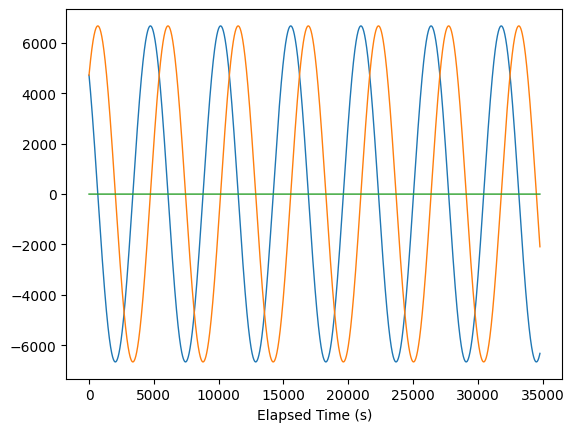

In [13]:
agent = sim_result.agent(sim_result.templated_agents[0])

block = agent.block('root')
print(block.summarize())

# simple line plot at default sizing
block.position.eci.plot(linewidth=1)


---------------------------------------------------------------------------
                            Agent Result Summary                           
                          'My In-orbit Spacecraft'                         
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Power
    • Guidance, Navigation, & Control
    • Command & Data Handling

📦 Available Blocks
    -------------------------------------------------------------------------------------------
    |              id                        type                          name               |
    -------------------------------------------------------------------------------------------
    | root                       |                                |                           |
    | YddJw9jfT-IveoP86XQjA      | PropagatedOrbitKinematics      | <Unnamed Block>           |
    | PS5Zl5BrhJFHlzfcgLP9ZL     | DataMode                       | Mission Operation         |


ValueError: Variable "soc" not found.

In [21]:
print(sim_result.agent("PRx5x67Z7LxtW5RNXvCfwR").summarize())

---------------------------------------------------------------------------
                            Agent Result Summary                           
                                  'Sat 2'                                  
---------------------------------------------------------------------------
🧩 Simulated Modules
    • Guidance, Navigation, & Control

📦 Available Blocks
    -------------------------------------------------------------------------------------------
    |              id                        type                          name               |
    -------------------------------------------------------------------------------------------
    | root                       |                                |                           |
    -------------------------------------------------------------------------------------------
---------------------------------------------------------------------------
❓ Query block results with .block(<ID>) or .block(<PARTIAL_ID>

In [6]:
agent_template = sedaro.agent_template(TEMP_AGENT_REPO_BRANCH_ID)

In [13]:
print(agent_template.block("PS5ZkPsYqsQCh6dFlbmQnZ").data["name"])
print(agent_template.block("PS5ZkPsYqsQCh6dFlbmQnZ").data["type"])

Downlink
LineOfSightTransmitInterface
